# Data Science Machine Learning 

The steps to create the predictive model is as follows:
1. Import the data
2. Data Cleaning/Feature Engineering
3. Pre Process for Neural network
4. Sample data/partition
5. Run the data on XG Boost to find feature importance
6. Run the data on various neural network architectures 

## Import

In [1]:
import math, keras, datetime, pandas as pd, numpy as np, keras.backend as K, numpy as np
import matplotlib.pyplot as plt, xgboost as xgb, operator, random, pickle
from pandas_summary import DataFrameSummary

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('E-Bike_Survey_Responses.csv')

In [4]:
df.head()

,Timestamp,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,Does your household have access to any of the following private motorized vehicles?,Do you support any of the following statements?,When you use Toronto's Multi-Use Trails do you mostly,Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?,Have you witnessed a collision or conflict on a trail between,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by motor power may be fined,When you use Toronto's bicycle lanes do you mostly,Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined,With regards to illegal use of bicycles and e-bikes on sidewalks should the City,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City
0,04/10/2013 12:10,35 to 49,Male,Good,Post graduate,$100K+,Self Employed,Central Toronto York or East York,Under 2 km,15 minutes or less,scooter type e-bike,Yes - a scooter style e-bike,On scooter type e-bikes the pedals are unneces...,drive a motor propelled e-bike,No,pedestrians and/or runners a conflict relating...,No - the trails are fine as they are,The bylaw should be modified to allow any kind...,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,be tolerant of bikes and e-bikes on the walksi...,Institute a speed limit for sidewalks
1,04/10/2013 12:30,18 to 34,Male,Excellent,University degree,$40K to $59K,Full Time,Central Toronto York or East York,10 - 20 km,30 - 44 minutes,scooter type e-bike,Yes - a scooter style e-bike,On scooter type e-bikes the pedals are unneces...,I very rarely use any of Toronto's Multi-Use P...,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,No changes are necessary to the existing bylaw,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,maintain the existing programs for signage edu...,Do nothing
2,04/10/2013 12:33,50 to 64,Male,Good,University degree,$40K to $59K,Self Employed,Central Toronto York or East York,10 - 20 km,15 minutes or less,private motor vehicle (car truck SUV van motor...,Yes - a car SUV truck or van,Most scooter type e-bikes are wider than a bic...,cycle I very rarely use any of Toronto's Multi...,No,I am not aware of any conflicts on the trails,Yes - more signage Yes - more enforcement (tic...,No changes are necessary to the existing bylaw,ride a road bicycle or a fixie,No changes are necessary to the existing bylaw,increase signage increase enforcement increase...,only wheelchairs at walking speed
3,04/10/2013 12:52,50 to 64,Male,Good,4 years university no degree,$80K to $99K,Self Employed,Central Toronto York or East York,Under 2 km,15 minutes or less,bicycle,Yes - a car SUV truck or van,On scooter type e-bikes the pedals are unneces...,cycle,No,a conflict between cyclists and pedestrians a ...,Yes - more signage Yes - more enforcement (tic...,Motorized vehicles should generally not be all...,ride a commuter or cruiser style bicycle,Motorized vehicles should generally not be all...,increase signage increase enforcement,Update the definition of a personal mobility d...
4,04/10/2013 13:24,18 to 34,Male,Very good,College or trade school diploma,$40K to $59K,Self Employed,Central Toronto York or East York,5 - 10 km,15 minutes or less,bicycle,Yes - a car SUV truck or van,

In [5]:
display(DataFrameSummary(df).summary())

,Timestamp,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,Does your household have access to any of the following private motorized vehicles?,Do you support any of the following statements?,When you use Toronto's Multi-Use Trails do you mostly,Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?,Have you witnessed a collision or conflict on a trail between,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by motor power may be fined,When you use Toronto's bicycle lanes do you mostly,Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined,With regards to illegal use of bicycles and e-bikes on sidewalks should the City,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City
count,2238,2234,2221,2227,2220,2178,2223,2237,2237,2237,2238,2238,2238,2238,2238,2238,2237,2238,2238,2238,2238,2232
unique,1722,5,12,12,24,6,33,68,5,6,33,123,534,89,2,221,134,25,69,258,224,81
top,04/12/2013 11:19,35 to 49,Male,Very good,University degree,$100K+,Full Time,Central Toronto York or East York,5 - 10 km,16 - 29 minutes,bicycle,Yes - a car SUV truck or van,scooter style e-bikes are different than pedal...,cycle,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,No changes are necessary to the existing bylaw,ride a commuter or cruiser style bicycle,No changes are necessary to the existing bylaw,maintain the existing programs for signage edu...,Update the definition of a personal mobility d...
freq,7,863,1554,891,895,831,1405,1634,847,782,777,1146,84,738,1131,847,646,811,705,664,493,1379
counts,2238,2234,2221,2227,2220,2178,2223,2237,2237,2237,2238,2238,2238,2238,2238,2238,2237,2238,2238,2238,2238,2232
uniques,1722,5,12,12,24,6,33,68,5,6,33,123,534,89,2,221,134,25,69,258,224,81
missing,0,4,17,11,18,60,15,1,1,1,0,0,0,0,0,0,1,0,0,0,0,6
missing_perc,0%,0.18%,0.76%,0.49%,0.80%,2.68%,0.67%,0.04%,0.04%,0.04%,0%,0%,0%,0%,0%,0%,0.04%,0%,0%,0%,0%,0.27%
types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,bool,categorical,categorical,categorical,categorical,categorical,categorical,categorical


## Transform Columns

In [6]:
d = df.apply(lambda x: x.groupby(x).transform('count'))
df=df.where(d.gt(10.0).where(d.notnull()).astype(bool), 'Other')
##df.where[df.iloc[:,[1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21]].where(d.gt(10.0).where(d.notnull()).astype(bool), 'Other')
##df[df.columns[1:10,12:21]].where(d.gt(10.0).where(d.notnull()).astype(bool), 'Other')

In [7]:
#d = df.apply(lambda x: x.groupby(x).transform('count'))
#cols_to_select = list(set(df.columns[1:10] + df.columns[12:21]))
#df=df[cols_to_select].where(d.gt(10.0).where(d.notnull()).astype(bool), 'Other')

### Column 11 

In [8]:
df[df.columns[11]].value_counts()


Yes - a car SUV truck or van                                     1146
No - I do not have access to a private motorized vehicle          522
Yes a motorcycle                                                  162
Other                                                             140
Yes - a pedal assist type e-bike                                   99
Yes - a scooter style e-bike                                       85
Yes - a car SUV truck or van Yes a motorcycle                      25
Yes - a car SUV truck or van Yes - a scooter style e-bike          22
Yes - a car SUV truck or van Yes - a pedal assist type e-bike      20
Yes a limited speed motorcycle (eg gas powered vespa)              17
Name: Does your household have access to any of the following private motorized vehicles?, dtype: int64

In [9]:
df[df.columns[11]] = df[df.columns[11]].str.replace('No - I do not have access to a private motorized vehicle','No')

In [10]:
g = ~(df[df.columns[11]].isin(['No']) | df[df.columns[11]].isnull())
df.loc[g, [df.columns[11]]] = 'Other'

In [11]:
#df[df.columns[11]] = df[[df.columns[11]].replace('No', '0', regex=True)
df[df.columns[11]] = df[df.columns[11]].replace(['No'], '0')
df[df.columns[11]] = df[df.columns[11]].replace(['Other'], '1')

In [12]:
df[df.columns[11]].value_counts()

1    1716
0     522
Name: Does your household have access to any of the following private motorized vehicles?, dtype: int64

### Rename column 


In [13]:
df=df.rename(columns={ df.columns[17]: "Col_17" })
df=df.rename(columns={ df.columns[19]: "Col_19" })
df=df.rename(columns={ df.columns[20]: "Col_20" })


## XGBoost Data Prep

In [14]:
joined=df

In [15]:
joined.head()

,Timestamp,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,Does your household have access to any of the following private motorized vehicles?,Do you support any of the following statements?,When you use Toronto's Multi-Use Trails do you mostly,Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?,Have you witnessed a collision or conflict on a trail between,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Col_17,When you use Toronto's bicycle lanes do you mostly,Col_19,Col_20,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City
0,Other,35 to 49,Male,Good,Post graduate,$100K+,Self Employed,Central Toronto York or East York,Under 2 km,15 minutes or less,scooter type e-bike,1,Other,drive a motor propelled e-bike,No,Other,No - the trails are fine as they are,The bylaw should be modified to allow any kind...,drive a scooter type e-bike propelled by an el...,Other,Other,Institute a speed limit for sidewalks
1,Other,18 to 34,Male,Excellent,University degree,$40K to $59K,Full Time,Central Toronto York or East York,10 - 20 km,30 - 44 minutes,scooter type e-bike,1,Other,I very rarely use any of Toronto's Multi-Use P...,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,No changes are necessary to the existing bylaw,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,maintain the existing programs for signage edu...,Do nothing
2,Other,50 to 64,Male,Good,University degree,$40K to $59K,Self Employed,Central Toronto York or East York,10 - 20 km,15 minutes or less,private motor vehicle (car truck SUV van motor...,1,Most scooter type e-bikes are wider than a bic...,cycle I very rarely use any of Toronto's Multi...,No,I am not aware of any conflicts on the trails,Yes - more signage Yes - more enforcement (tic...,No changes are necessary to the existing bylaw,ride a road bicycle or a fixie,No changes are necessary to the existing bylaw,Other,Other
3,Other,50 to 64,Male,Good,Other,$80K to $99K,Self Employed,Central Toronto York or East York,Under 2 km,15 minutes or less,bicycle,1,Other,cycle,No,Other,Yes - more signage Yes - more enforcement (tic...,Motorized vehicles should generally not be all...,ride a commuter or cruiser style bicycle,Motorized vehicles should generally not be all...,increase signage increase enforcement,Update the definition of a personal mobility d...
4,Other,18 to 34,Male,Very good,College or trade school diploma,$40K to $59K,Self Employed,Central Toronto York or East York,5 - 10 km,15 minutes or less,bicycle,1,Most scooter type e-bikes are wider than a bic...,cycle I very rarely use any of Toronto's Multi...,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,Motorized vehicles should generally not be all...,ride a road bicycle or a fixie,Motorized vehicles should generally not be all...,maintain the existing programs for signage edu...,Update the definition of a personal mobility d...


In [16]:
display(DataFrameSummary(joined).summary())

,Timestamp,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,Does your household have access to any of the following private motorized vehicles?,Do you support any of the following statements?,When you use Toronto's Multi-Use Trails do you mostly,Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?,Have you witnessed a collision or conflict on a trail between,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Col_17,When you use Toronto's bicycle lanes do you mostly,Col_19,Col_20,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City
count,2238,2234,2221,2227,2220,2178,2223,2237,2237,2237,2238,2238,2238,2238,2238,2238,2237,2238,2238,2238,2238,2232
unique,1,5,3,6,5,6,8,6,5,6,7,2,44,25,2,37,9,11,8,17,16,5
top,Other,35 to 49,Male,Very good,University degree,$100K+,Full Time,Central Toronto York or East York,5 - 10 km,16 - 29 minutes,bicycle,1,Other,cycle,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,No changes are necessary to the existing bylaw,ride a commuter or cruiser style bicycle,No changes are necessary to the existing bylaw,maintain the existing programs for signage edu...,Update the definition of a personal mobility d...
freq,2238,863,1554,891,895,831,1405,1634,847,782,777,1716,1227,738,1131,847,646,811,705,664,493,1379
counts,2238,2234,2221,2227,2220,2178,2223,2237,2237,2237,2238,2238,2238,2238,2238,2238,2237,2238,2238,2238,2238,2232
uniques,1,5,3,6,5,6,8,6,5,6,7,2,44,25,2,37,9,11,8,17,16,5
missing,0,4,17,11,18,60,15,1,1,1,0,0,0,0,0,0,1,0,0,0,0,6
missing_perc,0%,0.18%,0.76%,0.49%,0.80%,2.68%,0.67%,0.04%,0.04%,0.04%,0%,0%,0%,0%,0%,0%,0.04%,0%,0%,0%,0%,0.27%
types,constant,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,bool,categorical,categorical,bool,categorical,categorical,categorical,categorical,categorical,categorical,categorical


Now that we've engineered all our features, we need to convert to input compatible with a neural network.

This includes converting categorical variables into contiguous integers or one-hot encodings, normalizing continuous features to standard normal, etc...

In [17]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler

This dictionary maps categories to embedding dimensionality. In generally, categories we might expect to be conceptually more complex have larger dimension.



In [18]:
cat_var_dict = {'What age range do you fall in?': 10, 
                'Sex': 10, 
                'How would you describe your level of physical health?': 10, 
'What level of education have you reached?': 10, 
'What is your household income?': 10, 
'Which category best describes your employment?': 10,
'What Toronto district is your primary address located in?': 10, 
'On average what distance do you travel most days of the week?': 10, 
'On average how long is your commute?': 10, 
'Which transportation option do you end up using most often?': 10,
#'Does your household have access to any of the following private motorized vehicles?': 10, 
'Do you support any of the following statements?': 10, 
"When you use Toronto's Multi-Use Trails do you mostly": 10,
'Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?': 10, 
'Have you witnessed a collision or conflict on a trail between': 10, 
'Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?': 10,
#'Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by motor power may be fined': 10, 
'Col_17':10,
"When you use Toronto's bicycle lanes do you mostly": 10, 
#'Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined': 10,
'Col_19':10,
#'With regards to illegal use of bicycles and e-bikes on sidewalks should the City': 10,
'Col_20':10,
'Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City': 10}

Name categorical variables

In [19]:
cat_vars = [o[0] for o in 
            sorted(cat_var_dict.items(), key=operator.itemgetter(1), reverse=True)]

Replace nulls w/ 0 for continuous, "" for categorical.

In [20]:
for v in cat_vars: joined.loc[joined[v].isnull(), v] = ""
#joined = joined[joined[cat_vars]].replace(np.nan, '', regex=True)
#joined  = joined.fillna('')


Here we create a list of tuples, each containing a variable and an instance of a transformer for that variable.

For categoricals, we use a label encoder that maps categories to continuous integers. For continuous variables, we standardize them.

In [21]:
cat_maps = [(o, LabelEncoder()) for o in cat_vars]


The same instances need to be used for the test set as well, so values are mapped/standardized appropriately.

DataFrame mapper will keep track of these variable-instance mappings.

In [22]:
cat_mapper = DataFrameMapper(cat_maps)
cat_map_fit = cat_mapper.fit(joined)
cat_cols = len(cat_map_fit.features)
cat_cols

20

## Sample Data

In [23]:
n = len(joined)

In [24]:
samp_size = n
np.random.seed(42)

In [25]:
#idxs = sorted(np.random.choice(n, samp_size, replace=False))

In [26]:
train_ratio = 0.8
train_size = int(samp_size * train_ratio)

In [27]:
joined_train = joined[:train_size]
joined_valid = joined[train_size:]
len(joined_train),len(joined_valid)

(1790, 448)

In [28]:
def cat_preproc(dat):
    return cat_map_fit.transform(dat).astype(np.int64)

In [29]:
cat_map_train = cat_preproc(joined_train)
cat_map_valid = cat_preproc(joined_valid)

In [30]:
y_train_orig = joined_train['Does your household have access to any of the following private motorized vehicles?']
y_valid_orig = joined_valid['Does your household have access to any of the following private motorized vehicles?']

In [31]:
y_train = y_train_orig
y_valid = y_valid_orig

## XGBOOST

In [32]:
X_train = np.concatenate([cat_map_train], axis=1)


In [33]:
X_valid = np.concatenate([cat_map_valid], axis=1)


In [34]:
all_vars = cat_vars 

In [35]:
params = {
         "eta": 0.3,
          "max_depth": 13,
          "subsample": 0.8,
          "colsample_bytree": 0.1,
          "silent": 1,
          "min_child_weight": 6,
          'objective': 'binary:logistic',
          "seed" :42
          }


In [36]:
params['eval_metric'] = "error"


In [37]:
num_boost_round = 999


In [38]:
xdata = xgb.DMatrix(X_train, y_train, feature_names=all_vars)
xdata_val = xgb.DMatrix(X_valid, y_valid, feature_names=all_vars)

In [39]:
gbm = xgb.train(params, xdata, num_boost_round=num_boost_round,evals=[(xdata_val, "Test")],early_stopping_rounds=10)

[0]	Test-error:0.15625
Will train until Test-error hasn't improved in 10 rounds.
[1]	Test-error:0.162946
[2]	Test-error:0.15625
[3]	Test-error:0.15625
[4]	Test-error:0.15625
[5]	Test-error:0.158482
[6]	Test-error:0.15625
[7]	Test-error:0.158482
[8]	Test-error:0.149554
[9]	Test-error:0.154018
[10]	Test-error:0.154018
[11]	Test-error:0.154018
[12]	Test-error:0.154018
[13]	Test-error:0.154018
[14]	Test-error:0.154018
[15]	Test-error:0.151786
[16]	Test-error:0.149554
[17]	Test-error:0.142857
[18]	Test-error:0.140625
[19]	Test-error:0.138393
[20]	Test-error:0.133929
[21]	Test-error:0.136161
[22]	Test-error:0.133929
[23]	Test-error:0.136161
[24]	Test-error:0.136161
[25]	Test-error:0.133929
[26]	Test-error:0.133929
[27]	Test-error:0.131696
[28]	Test-error:0.131696
[29]	Test-error:0.131696
[30]	Test-error:0.127232
[31]	Test-error:0.127232
[32]	Test-error:0.136161
[33]	Test-error:0.131696
[34]	Test-error:0.133929
[35]	Test-error:0.140625
[36]	Test-error:0.133929
[37]	Test-error:0.140625
[38]	Te

In [40]:
gbm.eval(xdata_val)

'[0]\teval-error:0.131696'

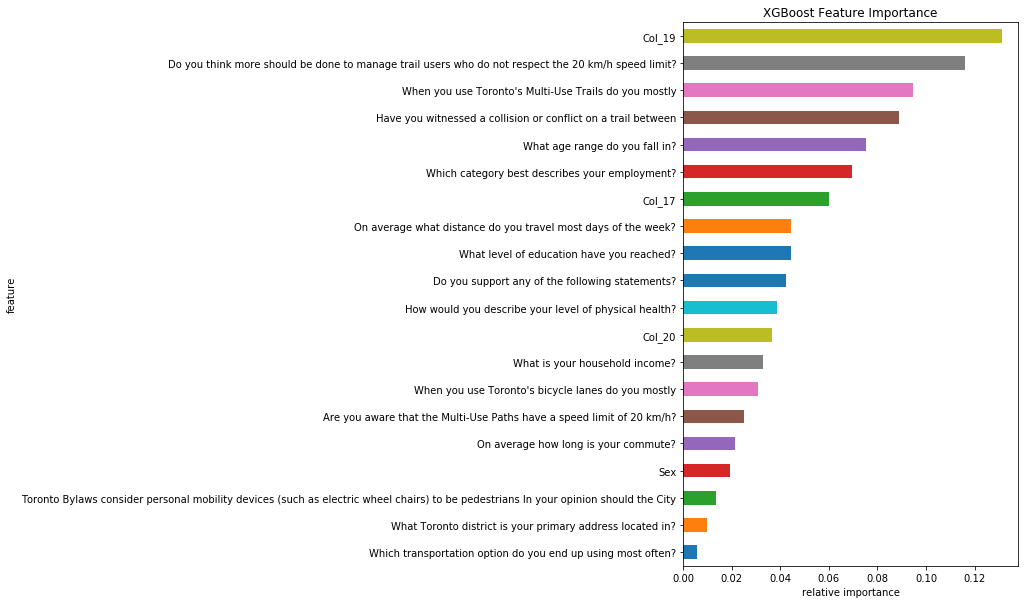

In [41]:
importance = gbm.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance');